In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !pip install selenium

In [3]:
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

In [4]:
# !apt-get update
# !apt install chromium-chromedriver

In [5]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # 웹드라이버를 브라우저 없이 실행
chrome_options.add_argument('--no-sandbox') # 보안기능 비활성화
chrome_options.add_argument('--disable-dev-shm-usage') # dev-shm을 사용 X
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options) # 공유메모리 담당

C:\Users\BAEKCH~1\AppData\Local\Temp/ipykernel_15232/791973495.py:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options) # 공유메모리 담당


In [6]:
tags = ['popular', 'best', 'recent']
urls = []
for tag in tags:
  # 수집하고자하는 주소
  driver.get("https://ohou.se/projects?writer=self&order=" + tag)
  time.sleep(2)
  for i in range(12):
    url = driver.find_elements(by=By.CSS_SELECTOR, value='a.project-feed__item__link')[i].get_attribute('href')
    urls.append(url)
print(urls)

['https://ohou.se/projects/62650/detail?affect_type=ProjectSelfIndex&affect_id=0', 'https://ohou.se/projects/62097/detail?affect_type=ProjectSelfIndex&affect_id=1', 'https://ohou.se/projects/62721/detail?affect_type=ProjectSelfIndex&affect_id=2', 'https://ohou.se/projects/62607/detail?affect_type=ProjectSelfIndex&affect_id=3', 'https://ohou.se/projects/61960/detail?affect_type=ProjectSelfIndex&affect_id=4', 'https://ohou.se/projects/62601/detail?affect_type=ProjectSelfIndex&affect_id=5', 'https://ohou.se/projects/62195/detail?affect_type=ProjectSelfIndex&affect_id=6', 'https://ohou.se/projects/62655/detail?affect_type=ProjectSelfIndex&affect_id=7', 'https://ohou.se/projects/61851/detail?affect_type=ProjectSelfIndex&affect_id=8', 'https://ohou.se/projects/63079/detail?affect_type=ProjectSelfIndex&affect_id=9', 'https://ohou.se/projects/62190/detail?affect_type=ProjectSelfIndex&affect_id=10', 'https://ohou.se/projects/62784/detail?affect_type=ProjectSelfIndex&affect_id=11', 'https://ohou

In [7]:
import pandas as pd
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup

In [8]:
# 저장할 데이터 프레임 생성
data = pd.DataFrame(data=[], columns=['순위', '날짜', '제목', '아이디', '거주구분', '평수', '지역', '스타일', '포스팅내용'])

In [9]:
def collector(url, data, k):
  req = requests.get(url)
  # 크롤링을 위한 준비
  soup = BeautifulSoup(req.text, 'html.parser')

  # 수집할 내용들
  date = soup.select('div.content-detail-header__author-date')[0].text.replace(' ','') # 날짜 / 공백 없애줌
  title = soup.select('h1')[0].text # 제목
  id = soup.select('div.content-detail-header__author-name')[0].text # 아이디
  ## 태그에서 찾기
  dt = [t.text for t in soup.select('div.project-detail-metadata-detail-item > dt')]
  dd = [t.text for t in soup.select('div.project-detail-metadata-detail-item > dd')]
  # 거주공간
  try: cat = dd[dt.index('공간')] 
  except: cat = None
  # 평수
  try: size = dd[dt.index('평수')]
  except: size = None
  # 지역
  try: city = dd[dt.index('지역')]
  except: city = None
  # 스타일
  try: style = dd[dt.index('스타일')]
  except: style = None
  p = [soup.select('p')[i].text.replace('\xa0',' ').replace("\r","").replace("\n","").replace("'","") for i in range(1,len(soup.select('p'))-1)] # 포스팅 내용
  p = ' '.join(p)

  # data에 저장
  temp = []
  temp.append((k, date,title,id,cat,size,city,p))
  temp = pd.DataFrame(temp, columns=('순위','날짜','제목','아이디','거주구분', '평수', '지역', '포스팅내용'))
  data = pd.concat([data,temp])

  print(str(k+1) + '번째 포스팅글 수집 끝')
  
  return data

In [10]:
for k,url in tqdm(enumerate(urls)):
  data = collector(url,data,k)
data = data.reset_index()

1it [00:03,  3.87s/it]

1번째 포스팅글 수집 끝


2it [00:06,  3.11s/it]

2번째 포스팅글 수집 끝


3it [00:09,  3.29s/it]

3번째 포스팅글 수집 끝


4it [00:16,  4.45s/it]

4번째 포스팅글 수집 끝


5it [00:19,  4.02s/it]

5번째 포스팅글 수집 끝


6it [00:23,  4.14s/it]

6번째 포스팅글 수집 끝


7it [00:30,  5.12s/it]

7번째 포스팅글 수집 끝


8it [00:35,  4.98s/it]

8번째 포스팅글 수집 끝


9it [00:37,  3.97s/it]

9번째 포스팅글 수집 끝


10it [00:43,  4.67s/it]

10번째 포스팅글 수집 끝


11it [00:44,  3.66s/it]

11번째 포스팅글 수집 끝


12it [00:51,  4.42s/it]

12번째 포스팅글 수집 끝


13it [00:52,  3.34s/it]

13번째 포스팅글 수집 끝


14it [01:00,  4.85s/it]

14번째 포스팅글 수집 끝


15it [01:06,  5.24s/it]

15번째 포스팅글 수집 끝


16it [01:06,  3.82s/it]

16번째 포스팅글 수집 끝


17it [01:07,  2.92s/it]

17번째 포스팅글 수집 끝


18it [01:08,  2.16s/it]

18번째 포스팅글 수집 끝


19it [01:15,  3.69s/it]

19번째 포스팅글 수집 끝


20it [01:18,  3.64s/it]

20번째 포스팅글 수집 끝


21it [01:19,  2.83s/it]

21번째 포스팅글 수집 끝


22it [01:21,  2.41s/it]

22번째 포스팅글 수집 끝


23it [01:23,  2.27s/it]

23번째 포스팅글 수집 끝


24it [01:23,  1.76s/it]

24번째 포스팅글 수집 끝


25it [01:26,  2.14s/it]

25번째 포스팅글 수집 끝


26it [01:29,  2.39s/it]

26번째 포스팅글 수집 끝


27it [01:34,  3.12s/it]

27번째 포스팅글 수집 끝


28it [01:36,  2.75s/it]

28번째 포스팅글 수집 끝


29it [01:37,  2.35s/it]

29번째 포스팅글 수집 끝


30it [01:39,  2.15s/it]

30번째 포스팅글 수집 끝


31it [01:40,  1.72s/it]

31번째 포스팅글 수집 끝


32it [01:49,  4.05s/it]

32번째 포스팅글 수집 끝


33it [01:51,  3.36s/it]

33번째 포스팅글 수집 끝


34it [01:57,  4.11s/it]

34번째 포스팅글 수집 끝


35it [02:00,  3.85s/it]

35번째 포스팅글 수집 끝


36it [02:04,  3.46s/it]

36번째 포스팅글 수집 끝


In [11]:
data

,index,순위,날짜,제목,아이디,거주구분,평수,지역,스타일,포스팅내용
0,0,0,21.10.06,"계획서만 50장! 내 머릿 속 인테리어,그대로 실현하기",to-mohome,아파트,33평,대구광역시 달성군,NaN,"안녕하세요. 오늘의 집에 첫 집들이를 소개하게 된 ""투모""입니다. 얼마 전 새로 이..."
1,0,1,21.10.06,"온전한 쉼을 위해, 취향으로 가득 채운 옐로우 하우스",alderdn,원룸&오피스텔,10평,경기도 성남시,NaN,안녕하세요. 유전공학 분야에서 연구원으로 일하고 있는 알데입니다. 저는 프로 집순...
2,0,2,21.10.06,"20년이 넘은 복도식 아파트, 반셀프로 단정하게 고치기",E.T.CITY,아파트,22평,서울특별시,NaN,안녕하세요 저희는 이번 5월에 결혼해서 따끈따끈한 일상을 보내고 있는 은또네입니다 ...
3,0,3,21.10.12,"휴양지의 정갈한 호텔 느낌, 설렘과 쉼을 주는 집🌴",juju____home,아파트,56평,None,NaN,안녕하세요. 해맑은 웃음을 지닌 6살 딸아이와 함께하는 결혼 10년 차 부부입니다....
4,0,4,21.10.02,최소한의 시공으로 취향을 가득담은 신혼집,난아링,아파트,25평,서울특별시 강동구,NaN,안녕하세요! 저희는 여행과 캠핑을 좋아하는 결혼 3년 차 신혼부부입니다. 야외생활을...
5,0,5,21.10.18,"아치 덕분에 동글동글, 같이 만든 화이트우드 하우스",eunii___,아파트,25평,서울특별시 강북구,NaN,"안녕하세요, 저희는 이제 곧 결혼 3년 차가 되는 직장인 신혼부부입니다. 남편과 저..."
6,0,6,21.10.14,디자이너의 구축 아파트 심폐소생술,soodaroo,아파트,14평,None,NaN,"안녕하세요. 나 혼자 산다 어느새 11년 차, 강수달 채널을 운영하고 있는 유튜버..."
7,0,7,21.10.07,"가족의 평화로운 전원생활, 미술관 같은 양평 흔연재",흔연재,단독주택,45평,경기도 양평군,NaN,"안녕하세요:) 저희는 여섯 살 아이, 고양이 2마리와 함께 살고 있는 양평 흔연재 ..."
8,0,8,21.10.21,매일이 호캉스😎 호텔 같이 깔끔한 30평대 리모델링,집도비zipdobi,아파트,32평,서울특별시 성동구,NaN,안녕하세요. 우선 저희는 코로나19로 결혼식은 하지 못하고 먼저 살게 된 동갑내기 ...
9,0,9,21.10.09,"소안재(小安齋) _ 작지만 편안한 공간, 퇴사 후 귀촌",Bongresson,단독주택,30평,전라남도 함평군,NaN,안녕하세요. 4년 차 신혼부부입니다. 최근 10년 넘게 다닌 회사를 퇴사하고 귀촌...


## wordcloud

In [12]:
# !pip install konlpy

In [13]:
import numpy as np
import time
import os
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
title = data['제목']
title.to_csv('오늘의 집 제목.txt', index = False)
posting = data['포스팅내용']
posting.to_csv('오늘의 집 포스팅.txt', index = False)

In [15]:
# 포스팅
with open('오늘의 집 포스팅.txt', 'r', encoding='utf-8') as f:
    text = f.read()
okt = Okt()
nouns = okt.nouns(text) 
words_pos = [n for n in nouns if len(n) > 1] # 한글자인 것은 제외

In [16]:
# 제목
with open('오늘의 집 제목.txt', 'r', encoding='utf-8') as title:
    text = title.read()
okt = Okt()
nouns = okt.nouns(text) 
words_title = [n for n in nouns if len(n) > 1] # 한글자인 것은 제외

In [17]:
# ! apt-get install fonts-nanum* # 한글 폰트 설치

In [18]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf  

In [19]:
# 단어 빈도표를 보고 일부 단어 불용어 처리
stopword = ['사용', '저희', '정말', '우리', '시공', '설치', '아파트', '모델링', '침대','때문','전체','가장','가족',
            '신혼집', '하우스', '원룸', '오피스텔', '생각', '느낌', '마음', '하나', '아이', '부분']
# 포스팅
text_pos = [i for i in words_pos if i not in stopword]
text_cnt_pos = Counter(text_pos)
# 제목
text_title = [i for i in words_title if i not in stopword]
text_cnt_title = Counter(text_title)

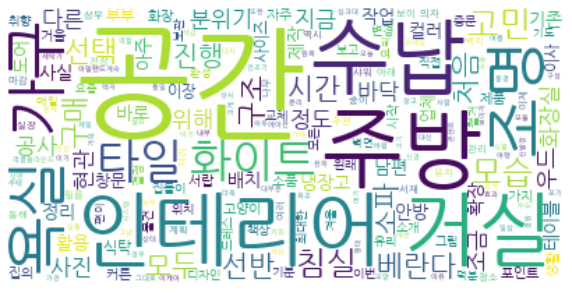

In [20]:
# 포스팅
fontpath = 'ng.ttf'

wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      # colormap = "Accent_r", 
                      # mask = img_mask, 
                      random_state = 20, 
                      max_words = 200).generate_from_frequencies(text_cnt_pos)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")        
plt.axis("off")

# plt.savefig("result_weebtoon.png")
plt.show()

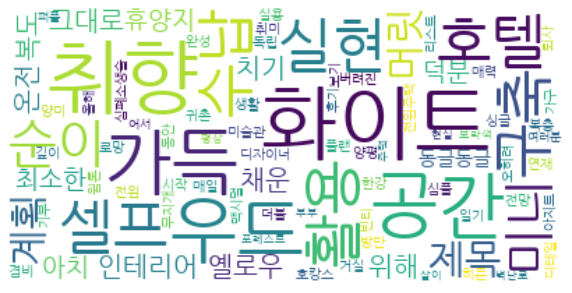

In [21]:
# colormap 글씨색 설정 가능, img_mask, mask 모양 설정
# img_mask = np.array(Image.open("heart.png"))

wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      # colormap = "Accent_r", 
                      # mask = img_mask, 
                      random_state = 20, 
                      max_words = 200).generate_from_frequencies(text_cnt_title)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")        
plt.axis("off")

# plt.savefig("result_weebtoon.png")
plt.show()

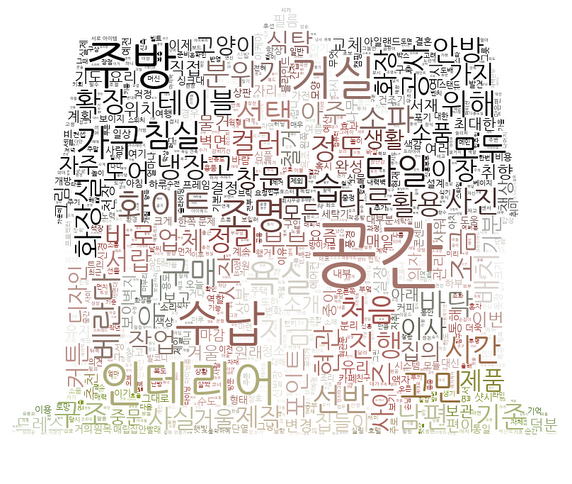

In [39]:
#워드클라우드로 나타내기
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

stopwords = set(STOPWORDS)    
img_mask = np.array(Image.open("집.png")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(STOPWORDS)    
FONTPATH =  "ng.ttf"

wordcloud = WordCloud(max_font_size = 100, max_words = 1000, background_color='white', stopwords=stopwords, random_state=10,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(text_cnt_pos)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.show()

### END